# SU - Assignment 6

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score, mean_squared_error
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("data.csv")
df = df.drop('Unnamed: 32',axis=1)
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x=='B' else 1)
df = df.dropna()

In [55]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
#with pd.option_context('display.max_columns',None):
#    print(df.head(10))

In [57]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=998)

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
y_test

180    1
185    0
477    0
199    1
309    0
      ..
415    0
475    0
316    0
557    0
532    0
Name: diagnosis, Length: 114, dtype: int64

In [50]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.000949,0.957878,0.504564,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.158051,0.262394,0.247386,0.238562,0.227677,0.099194,0.173626,0.078510,0.235082,0.089481,0.063990,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254338,0.168166
1,0.000949,0.146670,0.224066,0.138000,0.073807,0.361470,0.084565,0.003742,0.011948,0.324747,0.216949,0.113344,0.200292,0.090609,0.036661,0.430941,0.073212,0.004033,0.045539,0.228220,0.088968,0.140164,0.244136,0.124409,0.061886,0.534438,0.072387,0.005527,0.035808,0.269519,0.142885
2,0.000991,0.327465,0.286722,0.312211,0.193383,0.141284,0.103705,0.052109,0.066551,0.380303,0.108475,0.015933,0.047337,0.029920,0.013500,0.054220,0.081849,0.025010,0.091532,0.052168,0.041465,0.256492,0.260661,0.252951,0.131169,0.149706,0.168146,0.110543,0.213814,0.219440,0.142951
3,0.000953,0.353495,0.436100,0.350356,0.211750,0.416087,0.310472,0.276476,0.297217,0.449495,0.305508,0.035379,0.063853,0.032465,0.023568,0.079240,0.103028,0.050505,0.138341,0.081846,0.037353,0.369975,0.482409,0.336122,0.211070,0.554910,0.367038,0.396725,0.631615,0.628352,0.302646
4,0.000971,0.287236,0.171369,0.268952,0.164199,0.278866,0.055119,0.010682,0.043882,0.198485,0.104661,0.103567,0.103120,0.085285,0.048951,0.082775,0.018468,0.007149,0.091324,0.067439,0.047614,0.241907,0.143390,0.216893,0.119740,0.200951,0.030251,0.014569,0.121375,0.106664,0.069538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.000984,0.232335,0.475519,0.225278,0.123139,0.407150,0.189620,0.059864,0.108300,0.484343,0.268220,0.059098,0.185921,0.055270,0.023773,0.278138,0.212380,0.041162,0.175715,0.187881,0.047580,0.182142,0.404851,0.172718,0.082997,0.471703,0.185707,0.092971,0.283952,0.297516,0.120165
110,0.000990,0.276823,0.249793,0.270196,0.154146,0.340977,0.194191,0.136715,0.152982,0.325758,0.188347,0.013905,0.027726,0.020638,0.009036,0.107421,0.117974,0.083788,0.158363,0.093227,0.048167,0.219139,0.195362,0.213208,0.103372,0.405666,0.226747,0.277636,0.336186,0.283912,0.149780
111,0.000971,0.246060,0.181328,0.231221,0.134846,0.223075,0.039077,0.026312,0.025104,0.309596,0.132415,0.036140,0.052511,0.032088,0.016844,0.123398,0.026399,0.028359,0.095681,0.147397,0.001914,0.175027,0.118603,0.155336,0.080589,0.191045,0.025254,0.032875,0.063643,0.143336,0.033883
112,0.001005,0.115576,0.753942,0.106903,0.054210,0.258193,0.093031,0.000000,0.000000,0.344444,0.219280,0.154264,0.567092,0.134807,0.041666,0.335758,0.067504,0.000000,0.000000,0.295357,0.083924,0.091071,0.592217,0.080133,0.035735,0.238592,0.042970,0.000000,0.000000,0.179219,0.095082


### SVC Naive approach

In [69]:
#Majority class for reference
from sklearn.dummy import DummyClassifier
majority_classifier = DummyClassifier(strategy='most_frequent')
majority_classifier.fit(X_train, y_train)
y_pred = majority_classifier.predict(X_test)
dummy_accuracy = accuracy_score(y_test,y_pred)

In [70]:
baseline_svc = SVC(C=1,kernel='rbf',gamma='scale')

In [71]:
baseline_svc.fit(X_train,y_train)
y_pred = baseline_svc.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [74]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Majority Class Frequency: {dummy_accuracy:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.94
F1-Score: 0.95
Majority Class Frequency: 0.59


### Grid Search

In [84]:
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1.0]
}

#We will keep the regularization parameter at 1 for simplicity's sake
training_svc = SVC(C=1)

In [85]:
grid_search = GridSearchCV(estimator=training_svc, param_grid=params, scoring='f1', cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid={'gamma': ['scale', 'auto', 0.1, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [86]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'gamma': 'scale', 'kernel': 'poly'}


In [90]:
optimal_svc = SVC(C=1,kernel='poly',gamma='scale')
optimal_svc.fit(X_train,y_train)
y_pred = optimal_svc.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Majority Class Frequency: {dummy_accuracy:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.94
F1-Score: 0.95
Majority Class Frequency: 0.59


# Custom Kernel regression

In [123]:
#We are only implementing the RBF kernel function
class KernelRegression:
    def __init__(self,gamma=1,regularization=1):
        self.gamma = gamma
        self.regularization = regularization
        self.kernel_matrix = None
        self.X_train = None
        self.y_train = None
        
    def rbf(self,X1, X2):
        X1_norm = np.sum(X1**2,axis=-1)
        X2_norm = np.sum(X2**2,axis=-1)
        sq_norm = -2* np.dot(X1, X2.T) + X1_norm[:, None] + X2_norm.T[None, :]
        K = np.exp(-self.gamma * sq_norm)
        return K
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        #Kernel matrix using kernel function, and then add to it regularization * identity matrix
        self.kernel_matrix = self.rbf(X_train,X_train)
        
        self.kernel_matrix += np.eye(len(X_train)) * self.regularization
        
        self.weights = np.linalg.solve(self.kernel_matrix, y_train)
        
    def predict(self, X_test):
        predictions = [
            self.rbf(sample.reshape(1,-1), self.X_train).dot(self.weights)
            for sample
            in X_test
        ]
        
        return np.array(predictions)

In [124]:
my_kc = KernelRegression()

In [125]:
my_kc.fit(X_train,y_train)
y_pred = my_kc.predict(X_test)

In [126]:
y_pred

array([[ 6.88381724e-01],
       [ 3.09792726e-02],
       [ 6.77507255e-04],
       [ 9.09460331e-01],
       [-5.11912972e-03],
       [ 9.86366241e-01],
       [ 6.28069295e-01],
       [ 6.68924040e-01],
       [ 1.52544178e-03],
       [ 9.59258996e-01],
       [ 9.54201249e-01],
       [ 1.81466100e-02],
       [ 1.10590138e+00],
       [ 6.71795785e-01],
       [ 1.04128092e+00],
       [ 1.05296706e+00],
       [-1.24277808e-01],
       [ 7.23024543e-01],
       [ 4.24089408e-01],
       [ 1.02293354e+00],
       [-3.76653307e-02],
       [ 3.62138897e-02],
       [-7.36272157e-02],
       [ 2.24574077e-01],
       [ 7.44136140e-01],
       [-4.89612813e-02],
       [ 2.34435035e-01],
       [ 2.84533661e-01],
       [ 8.51924485e-01],
       [ 7.21101069e-01],
       [ 5.87691176e-01],
       [-1.32671971e-02],
       [ 2.04159678e-01],
       [-4.51282647e-02],
       [ 4.03915345e-02],
       [ 2.31064017e-01],
       [ 2.56470885e-01],
       [ 6.16780466e-01],
       [ 8.7

#### I don't understand how this helps us for binary classification, so let's test on some other dataset. House price perhaps?

In [129]:
df = pd.read_csv("House_Price.csv")
df = pd.get_dummies(df,columns=['waterbody'])
df[['airport','bus_ter']] = df[['airport','bus_ter']].applymap(lambda x: 1 if x=='YES' else 0)
df = df.dropna()

In [131]:
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141)

In [132]:
#min max scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
my_krr = KernelRegression()
my_krr.fit(X_train,y_train)
y_pred = my_krr.predict(X_test)

In [136]:
rmse_test = mean_squared_error(y_test,y_pred,squared=False)

In [137]:
print(f"RMSE on the test set after scaling: {rmse_test}")

RMSE on the test set after scaling: 7.599852703973419


#### Far worse than assignment 4. Let's see some plots

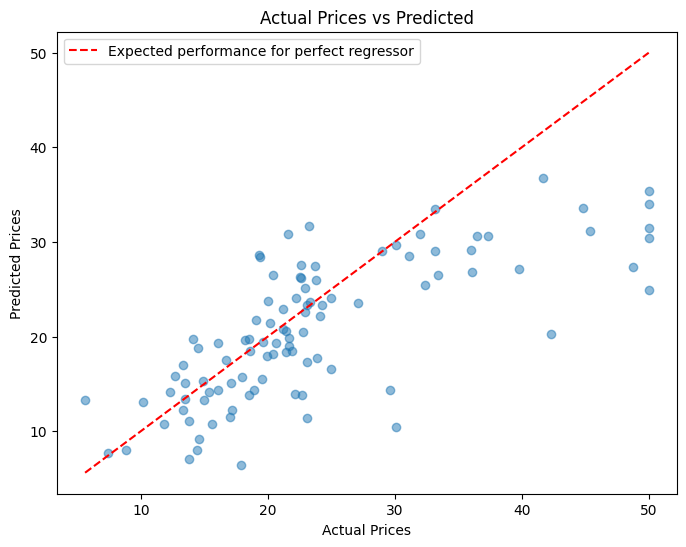

In [140]:
# Scatterplot of predictions vs. ground truth
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--',label="Expected performance for perfect regressor")
plt.legend()
plt.show()

#### It's predictions are very 'logarithmic',  